# Multinomial Niave Bayes

## Importing Processed Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
data = pd.read_csv('/Users/svr/Desktop/DSBA/NLP/FINAL/IMDB Dataset proccessed.csv')
data.head()

,review,sentiment
0,reviewer mention watch oz episode hook right e...,1
1,wonderful little production filming technique ...,1
2,I think wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1


## Data Split

In [4]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data["review"]  # Use processed text column
y = data["sentiment"]  # Target labels (0 or 1)

# Split dataset into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y  # stratify ensures balanced classes
)

print("Data Split Done..")


Data Split Done..


# TF-IDF Vectorization (Feature Extraction)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=20000)

# Fit TF-IDF on cleaned training data
vectoriser.fit(X_train)

print('Vectoriser fitted.')
print('No. of feature words:', len(vectoriser.get_feature_names_out()))


Vectoriser fitted.
No. of feature words: 20000


In [6]:
# Apply transformation to convert text to TF-IDF vectors
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

print('Data Transformed.')


Data Transformed.


# Base Multimonimial Naive Bayes Model

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train the Naïve Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for class imbalance
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")

# Print classification report
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.8640
✅ Precision: 0.8643
✅ Recall: 0.8640
✅ F1-score: 0.8640

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5000
           1       0.85      0.88      0.87      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Base Model Confusion Matrics


🔹 Confusion Matrix:
[[4247  753]
 [ 607 4393]]


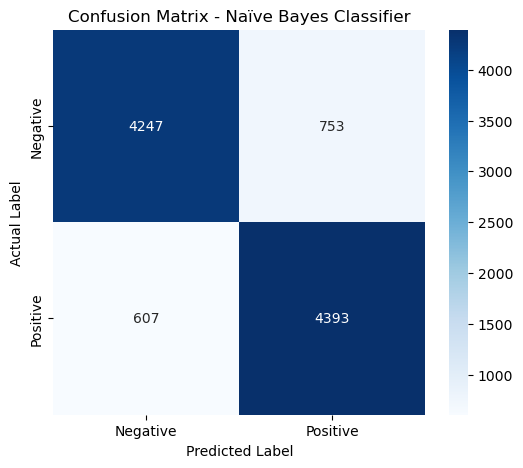

In [8]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("\n🔹 Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Naïve Bayes Classifier")
plt.show()


# Multinomial Naive Bayes Hyper Parameter Tuning

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define parameter grid for tuning
param_grid = {
    'alpha': [0.01, 0.05, 0.1, 0.3, 0.5, 1.0, 1.5, 2.0, 5.0, 10.0],
    'fit_prior': [True, False]
}

# Set up grid search with 5-fold cross-validation
grid_search = GridSearchCV(MultinomialNB(), param_grid, scoring='accuracy', cv=5)

# Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model from grid search
best_nb = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_nb.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

# Print results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")

# Print classification report
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_best))


✅ Accuracy: 0.8635
✅ Precision: 0.8637
✅ Recall: 0.8635
✅ F1-score: 0.8635

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5000
           1       0.85      0.88      0.87      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Tuned Model Confusion Matrics


🔹 Confusion Matrix:
[[4252  748]
 [ 617 4383]]


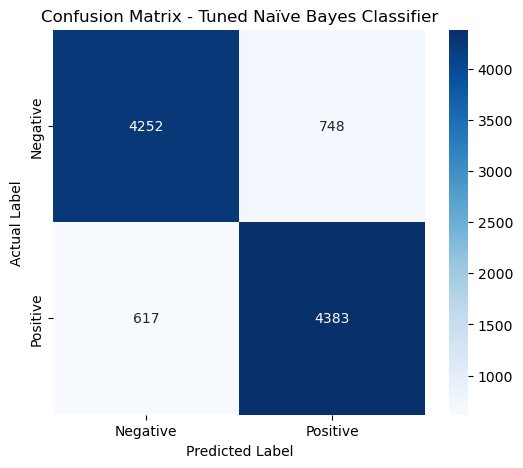

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for the tuned model predictions
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Print confusion matrix
print("\n🔹 Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Tuned Naïve Bayes Classifier")
plt.show()


## ROC CUrve

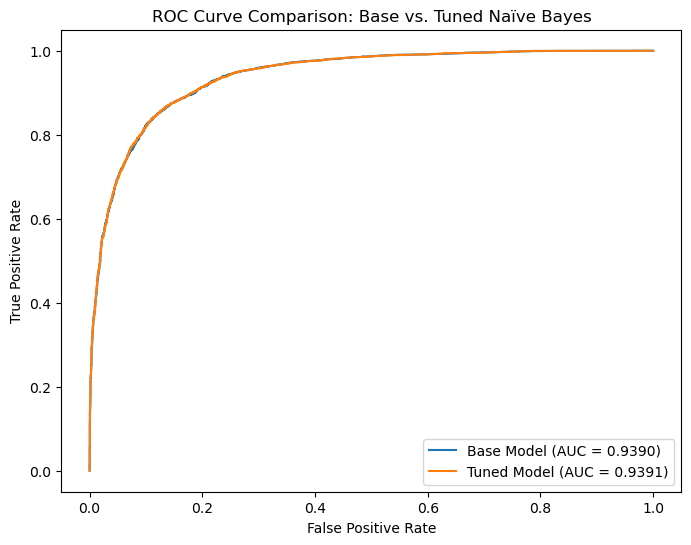

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Train the base model (if not already trained)
base_nb = MultinomialNB()
base_nb.fit(X_train, y_train)

# 2. Get predicted probabilities for the base model
y_proba_base = base_nb.predict_proba(X_test)[:, 1]

# 3. Get predicted probabilities for the tuned model
y_proba_tuned = best_nb.predict_proba(X_test)[:, 1]

# 4. Compute ROC metrics for the base model
fpr_base, tpr_base, _ = roc_curve(y_test, y_proba_base)
auc_base = roc_auc_score(y_test, y_proba_base)

# 5. Compute ROC metrics for the tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_proba_tuned)
auc_tuned = roc_auc_score(y_test, y_proba_tuned)

# 6. Plot both ROC curves on the same figure
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, label=f"Base Model (AUC = {auc_base:.4f})")
plt.plot(fpr_tuned, tpr_tuned, label=f"Tuned Model (AUC = {auc_tuned:.4f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Base vs. Tuned Naïve Bayes")
plt.legend()
plt.show()
